### Preliminary Actions

In [53]:
# There are many warnings regarding the updates in the future releases of the libraries. Ignore them.
import warnings
warnings.filterwarnings("ignore")

# Set the backend of matplotlib to inline
%matplotlib inline

# Import necessary libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

# Set style and context
sns.set_style('whitegrid')
sns.set_context('talk')

# Read the csv file created in the Data Wrangling section
df=pd.read_csv('wrangled_data.csv')

#Print the first five rows of the data
df.head()

,state,county,region,RUCC,less_than_high_school,high_school_diploma,college/associate_degree,bachelors/higher,poverty,unemployment
0,AL,Autauga County,South,2.0,12.417,34.331,28.660,24.593,14.0,5.3
1,AL,Baldwin County,South,3.0,9.972,28.692,31.788,29.547,12.0,5.4
2,AL,Barbour County,South,6.0,26.236,34.927,25.969,12.868,30.0,8.6
3,AL,Bibb County,South,1.0,19.302,41.816,26.883,12.000,20.0,6.6
4,AL,Blount County,South,1.0,19.969,32.942,34.039,13.050,14.0,5.5


### Step 1: Create the boxplot of all quantitative variables to understand their distribution based on the five number summary

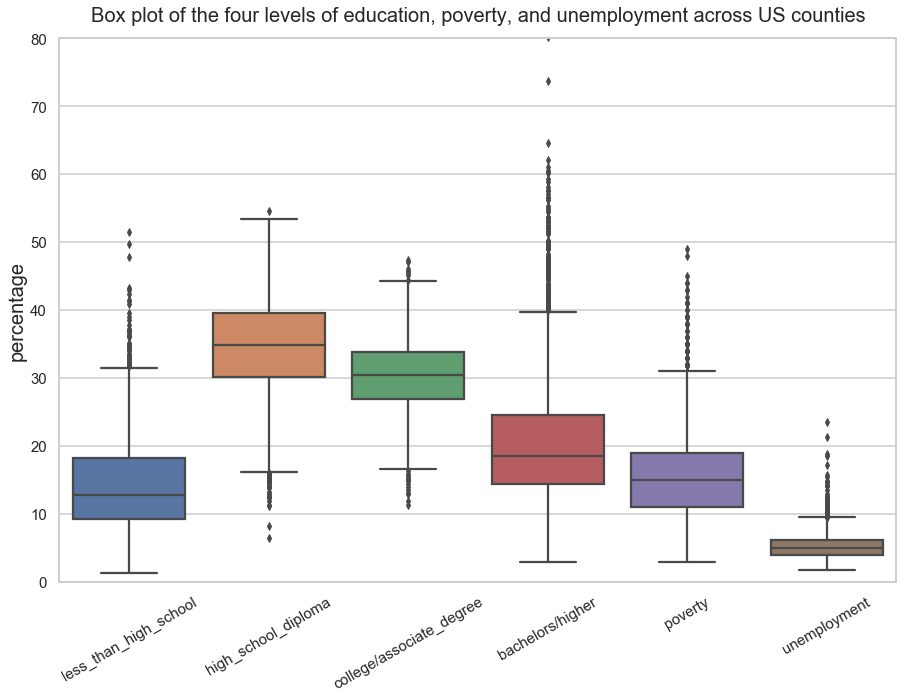

In [54]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df.iloc[:,4:])
plt.title('Box plot of the four levels of education, poverty, and unemployment across US counties',fontsize=20, y=1.02)
plt.ylabel('percentage',fontsize = 20)
plt.xticks(rotation=30)
plt.tick_params(axis='both',labelsize = 15)
plt.ylim(0,80)
plt.show()

### Observations 
#### 1) Among the four education levels, 
####   a) The first quartile, median, and third quartile of less_than_high_school are the lowest among the four first quartiles, the four medians, and the four third quartiles, respectively.  The quartiles of high_school_diploma are the highest.  the quartiles of College/associate_degree and bachelors/higher are ranked second and third, respectively. 

####  b) College/associate_degree has the lowest width of inter quartile range. It means it has the most dense distribution. On the other hand, high_school_diploma and bachelors/higher have the widest inter quartile ranges, but bachelors/higher have many more outliers than high_school_diploma, and so it has the least dense distribution

#### 2) Less_than_high_school, bachelors/higher, poverty, and unemployment are skewed right because they have many outliers above the upper whisker. High_school_diploma is slightly skewed left. College/associate_degree is approximately not skewed

#### 3) Unemployment has the most dense distribution among all the quantitative variables. The distance between lower and upper whiskers is less than ten percent

### Step 2: Examine the relationship between each level of education on the one hand, and unemployment and poverty on the other hand
</div>

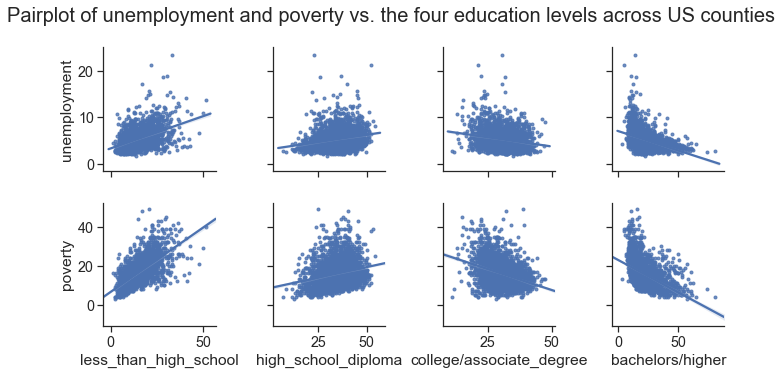

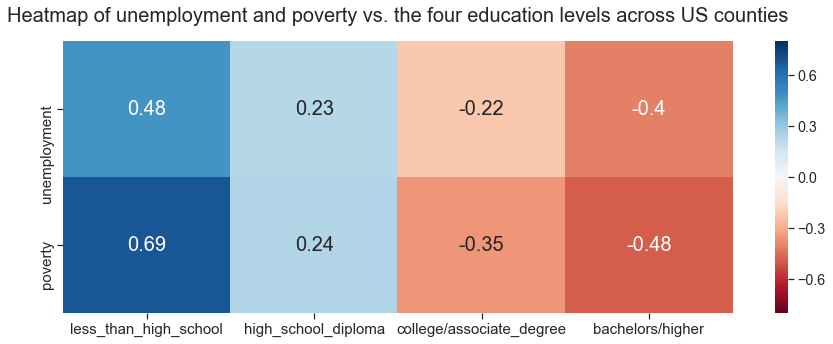

In [55]:
# Change the plot style and font scale to have a clearer plot
sns.set(style="ticks", font_scale=1.3)

# Create a dataframe with only six columns: four levels of education, unemployment, and poverty
df_reduced = df.loc[:,['less_than_high_school','high_school_diploma','college/associate_degree'\
                       ,'bachelors/higher','unemployment','poverty']]

# pairplot poverty and unemployment vs each level of education  and plot the regression line
g=sns.pairplot(df,x_vars=['less_than_high_school','high_school_diploma','college/associate_degree'\
                                ,'bachelors/higher'],y_vars=['unemployment','poverty'],kind="reg",markers='.')
g.fig.suptitle("Pairplot of unemployment and poverty vs. the four education levels across US counties",fontsize=20,y=1.05)

# Create the correlation matrix and separate the target elements
corr_df_reduced = df_reduced.corr().iloc[4:,:4]

# Resize the plot for heatmap
plt.figure(figsize = (15,5))
# Plot the heatmap, annotate it, and resize the annotation
sns.heatmap(corr_df_reduced,annot=True, vmin=-0.8, vmax=0.8, cmap = 'RdBu',annot_kws={"size": 20})
plt.title('Heatmap of unemployment and poverty vs. the four education levels across US counties',fontsize=20, y=1.05)
plt.tick_params(axis='both',labelsize = 15)
plt.show()

### Observation 
#### As the education level goes higher, the slope of regression line as well as the correlation coefficient between the education level and both poverty and unemployment go lower. In other words, higher education results in lower unemployment and poverty.

### Step 3: Examine the correlation between education, unemployment, and poverty all together. In order to simplify the interpretation, a new education variable is introduced to be used instead of the four education levels. The plots above show that poverty and unemployment are positively correlated to less_than_high_school and high_school_diploma, and negatively correlated to college/associate_degree and bachelors/higher. Therefore, an appropriate option as the new education variable is either sum of the first two or the last two education levels. The latter is chosen so that the higher value of the new variable represents the higher percentage of county population who are more educated and achieved some degree beyond high school diploma

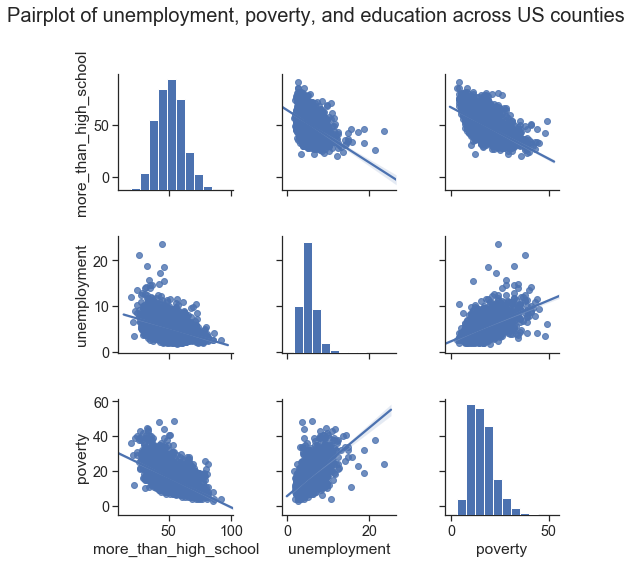

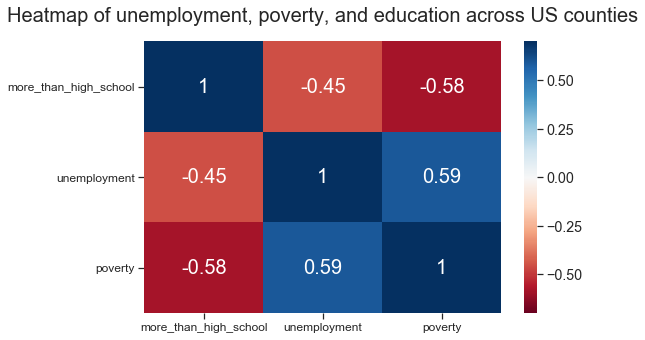

In [56]:
# Define the new column for the new variable
df['more_than_high_school'] = df['college/associate_degree']+df['bachelors/higher']

# Create a dataframe with only three columns: more than high school, unemployment, and poverty
df_reduced = df.loc[:,['more_than_high_school','unemployment','poverty']]

#Create the paiplot between the three variables and add the regression line
g=sns.pairplot(df_reduced,kind="reg")
g.fig.suptitle("Pairplot of unemployment, poverty, and education across US counties",fontsize=20,y=1.05)

# Create the correlation matrix
corr_df_reduced = df_reduced.corr()

#Resize the plot for heatmap
plt.figure(figsize = (8,5))

# Plot the heatmap, annotate it, and resize the annotation
sns.heatmap(corr_df_reduced,annot=True,vmin=-0.7,vmax=0.7,cmap='RdBu',annot_kws={"size": 20})
plt.title('Heatmap of unemployment, poverty, and education across US counties',fontsize=20,y=1.05)
plt.tick_params(axis='both',labelsize=12)
plt.xticks(rotation = 0)
plt.show()

### Observation 
#### Unemployment and poverty are strongly correlated to each other. In addition, both have strongly negative correlation with education.

### Step 4: Create the boxplot of the four education levels as well as unemployment and poverty across the counties in each of the nine rural urban continuum codes (RUCC). For more information on RUCC check below. Two plots are provided to avoid a single busy plot.

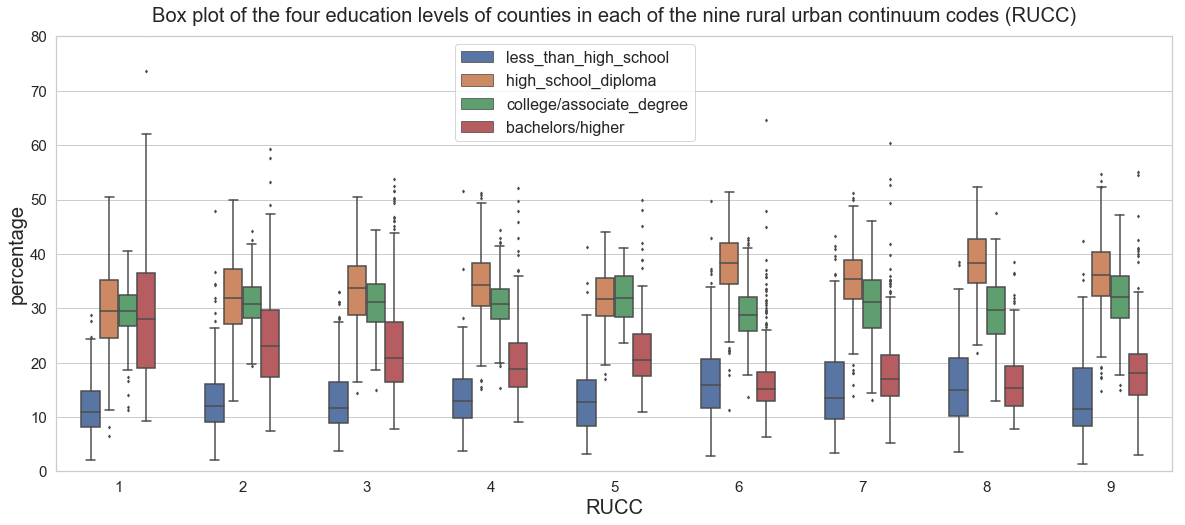

In [57]:
# Set style
sns.set_style('whitegrid')

# Change RUCC column from float to integer and sort the RUCC column
df.RUCC=df.RUCC.astype('int')
df.sort_values(['RUCC'],inplace=True)

#Melt the dataframe based on the four education levels
df_melt1 = pd.melt(df,id_vars='RUCC',value_vars=['less_than_high_school','high_school_diploma','college/associate_degree',\
                                                'bachelors/higher'], var_name='variable',value_name='percentage')

# Create the boxplot of the four education level for each RUCC code
figure, ax = plt.subplots(figsize=(20,8))
sns.boxplot(ax=ax, x='RUCC',y='percentage',hue='variable',data=df_melt1,fliersize=2,width=0.6)
ax.legend(loc='lower left',bbox_to_anchor=(0.35,0.74),fontsize=16)
ax.set_ylim(0,80)
ax.set_title('Box plot of the four education levels of counties in each of the nine rural urban continuum codes (RUCC)',\
             fontsize = 20, y=1.02)
ax.set_xlabel('RUCC',fontsize = 20)
ax.set_ylabel('percentage',fontsize = 20)
ax.tick_params(axis='both', labelsize=15)
plt.show()

### Observation
#### As it was observed in step 1, over the entire US, less_than_high_school, bachelors/higher, college/associate_degree, and high_school_diploma, respectively, have lowest to highest quartiles (median, first and third quartiles) among the four first quartiles, the four medians, and the four third quartiles, respectively. There are three groups of RUCC regarding this pattern:

#### a) Group 1 includes only RUCC 1: compared to the general trend, in RUCC 1, the quartiles of the box plot of bachelors/higher (the red box) is too far from the corresponding quartiles of the box plot of less_than_high_school (the blue box) and too close to the corresponding quartiles of the box plots of the other two education levels (orange and green boxes).The median of bachelors/higher is approximately equal to the medians of high_school_diploma and college/associate_degree. Its third quartile is even larger than theirs.
#### b) Group 2 includes RUCC 2 to 5: the quartiles of the box plot of bachelors/higher (the red box) gets closer to the corresponding quartiles of the box plot of less_than_high_school (the blue box) and further from the corresponding quartiles of the box plots of the other two education levels (orange and green boxes). This results in the distributions of the four education levels of RUCC 2 to 5 approximately follow the general trend.
#### c) Group 3 includes RUCC 6 to 9: compared to the general trend, in RUCC 6 to 9, the quartiles of the box plot of bachelors/higher (the red box) is too close to the corresponding quartiles of the box plot of less_than_high_school (the blue box) and too far from the corresponding quartiles of the  box plots of the other two education levels (orange and green boxes).
#### Therefore, it can be concluded that the overall education of a county depends on the size of its population; counties with more than 1 million population (RUCC 1) have the highest education while counties with less than 20'000 population (RUCC 6 to 9) have the lowest.

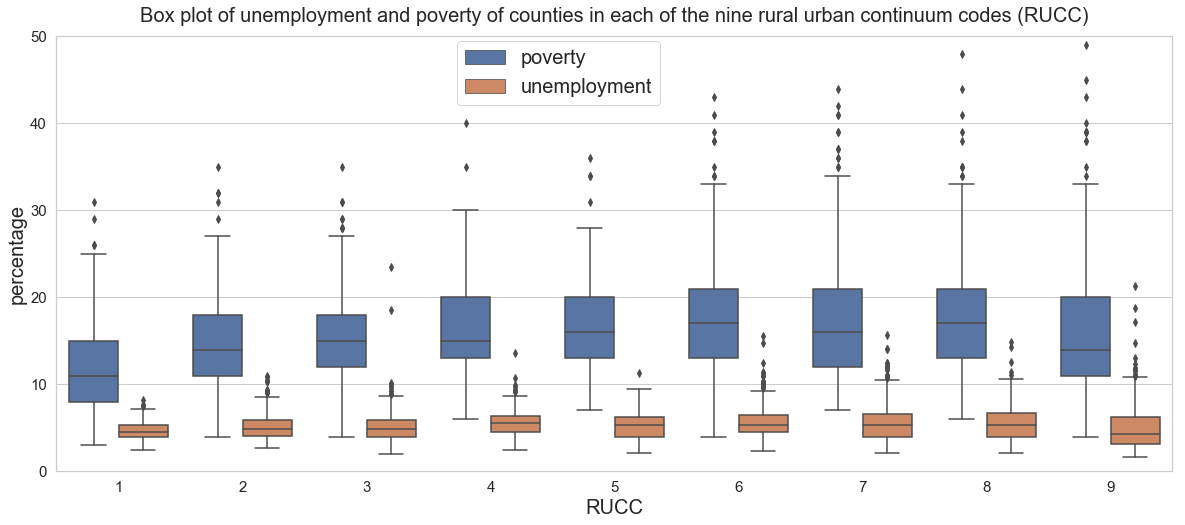

In [58]:
#Melt the dataframe based on unemployment and poverty
df_melt2 = pd.melt(df,id_vars='RUCC',value_vars=['poverty','unemployment'], var_name='variable',value_name='percentage')

# Create the boxplot of the poverty and unemployment for each RUCC code
figure, ax = plt.subplots(figsize=(20,8))
sns.boxplot(ax=ax, x='RUCC',y='percentage',hue='variable', data=df_melt2)
ax.legend(loc='lower left',bbox_to_anchor=(0.35,0.82),fontsize=20)
ax.set_title('Box plot of unemployment and poverty of counties in each of the nine rural urban continuum codes (RUCC)',\
             fontsize = 20, y = 1.02)
ax.set_xlabel('RUCC',fontsize = 20)
ax.set_ylabel('percentage',fontsize = 20)
ax.tick_params(axis='both', labelsize=15)
ax.set_ylim(0,50)
plt.show()

### Observations

#### 1) The quartiles (first quartile, median, and third quartile) of the poverty in RUCC 1 (The blue box) is significantly lower compared to the corresponding quartiles of the rest of RUCC. In other words, counties in RUCC 1 have the least poverty among all rural urban continuum codes

#### 2) The medians of the poverty in RUCC 2 to RUCC 9 are quite close to each other but the first and third quartiles of RUCC 2 and 3 are lower than the corresponding quartiles of RUCC 4 to 9.

#### 3) There is not a major difference between the unemployment distribution (the orange boxes) of the nine RUCC.

### Step 5: Create the barplot of the mean of each six quantitative variables of counties across the nine RUCC

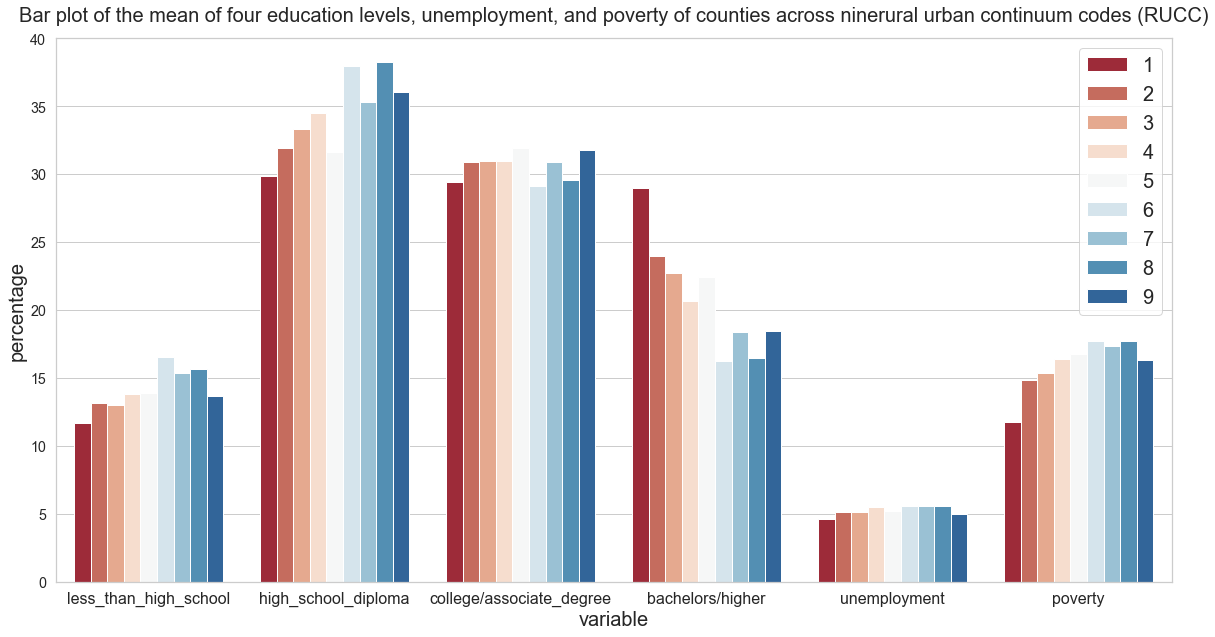

In [59]:
# Melt the dataframe across all quantitative variables 
df_melt3 = pd.melt(df,id_vars='RUCC',value_vars=['less_than_high_school','high_school_diploma',\
                                                 'college/associate_degree','bachelors/higher','unemployment',\
                                                 'poverty'], var_name='variable',value_name='percentage')

# Create the bar plot
plt.figure(figsize=(20,10))
sns.barplot(x='variable',y='percentage',hue='RUCC',data=df_melt3,palette='RdBu',ci=None)
plt.title('Bar plot of the mean of four education levels, unemployment, and poverty of counties across nine\
rural urban continuum codes (RUCC)',fontsize = 20, y=1.02)
plt.legend(fontsize=20)
plt.xlabel('variable',fontsize = 20)
plt.ylabel('percentage',fontsize = 20)
plt.tick_params(axis='x', labelsize=16)
plt.ylim(0,40)
plt.show()

### Observations
#### As the plot moves from more metropolitan counties or lower RUCC to more non-metropolitan counties or higher RUCC, approximately:
#### 1) The mean of less_than_high_school and the mean of high_school_diploma go up while the mean of bachelors/higher goes down. The mean of college/associate_degree almost remains the same.
#### 2) The mean of poverty goes up.
#### 3) The mean of unemployment almost remains the same

# Alternative for steps 4 & 5

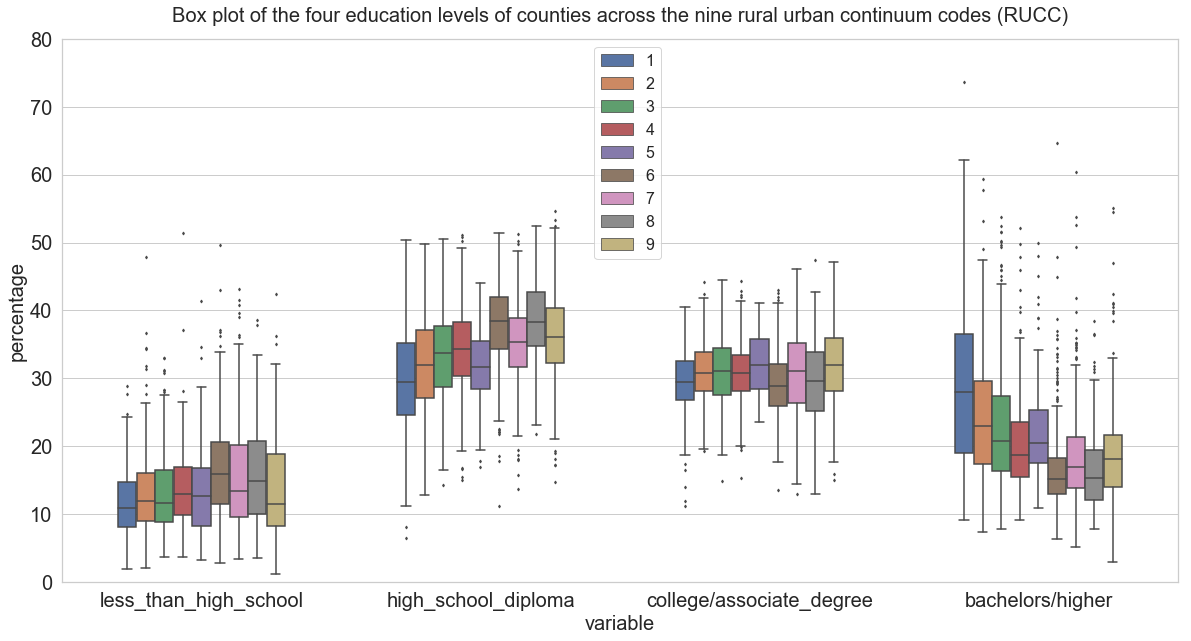

In [60]:
# Set style
sns.set_style('whitegrid')

# Change RUCC column from float to integer and sort the RUCC column
df.RUCC=df.RUCC.astype('int')
df.sort_values(['RUCC'],inplace=True)

#Melt the dataframe based on the four education levels
df_melt1 = pd.melt(df,id_vars='RUCC',value_vars=['less_than_high_school','high_school_diploma','college/associate_degree',\
                                                'bachelors/higher'], var_name='variable',value_name='percentage')

# Create the boxplot of the four education level for each RUCC code
figure, ax = plt.subplots(figsize=(20,10))
sns.boxplot(ax=ax, x='variable',y='percentage',hue='RUCC',data=df_melt1,fliersize=2,width=0.6)
ax.legend(loc='lower left',bbox_to_anchor=(0.47,0.58),fontsize=16)
ax.set_ylim(0,80)
ax.set_title('Box plot of the four education levels of counties across the nine rural urban continuum codes (RUCC)',\
             fontsize = 20, y=1.02)
ax.set_xlabel('variable',fontsize = 20)
ax.set_ylabel('percentage',fontsize = 20)
ax.tick_params(axis='both', labelsize=20)
plt.show()

### Observations

#### 1) less_than_high_school: RUCC 1 (the blue box) has the lowest quartiles (first quartile, median, and third quartile) compared to the corresponding quartiles of the rest of RUCC. In addition, RUCC 2 to 5 (orange, green, red, and purple boxes) overall have lower mean and especially lower third quartiles compared to the corresponding quartiles in RUCC 6 to 9 (brown, pink, gray, and beige boxes).

#### 2) high_school_diploma: Again,  RUCC 1 (the blue box) has the lowest quartiles compared to the corresponding quartiles in the rest of RUCC. Also, the quartiles in RUCC 2 to 5 (orange, green, red, and purple boxes) in the one hand are lower than the corresponding quartiles in RUCC 6 to 9 (brown, pink, gray, and beige boxes) on the other hand. The differences between the quartiles of RUCC 2 to 5  and the corresponding quartiles in RUCC 6 to 9  are more obvious than the case in less_than_high_school

#### 3) college/associate_degree: There is not a significant difference across the nine RUCC. Their means are quite close to each other, and except for some, their first as well as third quartiles are close to each other as well.

#### 4) bachelors/higher: The nine RUCC can be divided into three categories similar to less_than_high_school and  high_school_diploma, but the difference is the percentages go lower as RUCC goes higher. RUCC 1 has the highest first quartile and especially mean and third quartile compared to the corresponding quartiles in the rest of RUCC. Also, RUCC 2 to 5 have higher first quartiles, medians, and third quartiles than the corresponding quartiles in RUCC 6 to 9

#### Therefore, it can be concluded that the overall education of a county depends on the size of its population; counties with more than 1 million population (RUCC 1) have the highest education while counties with less than 20'000 population (RUCC 6 to 9) have the lowest.

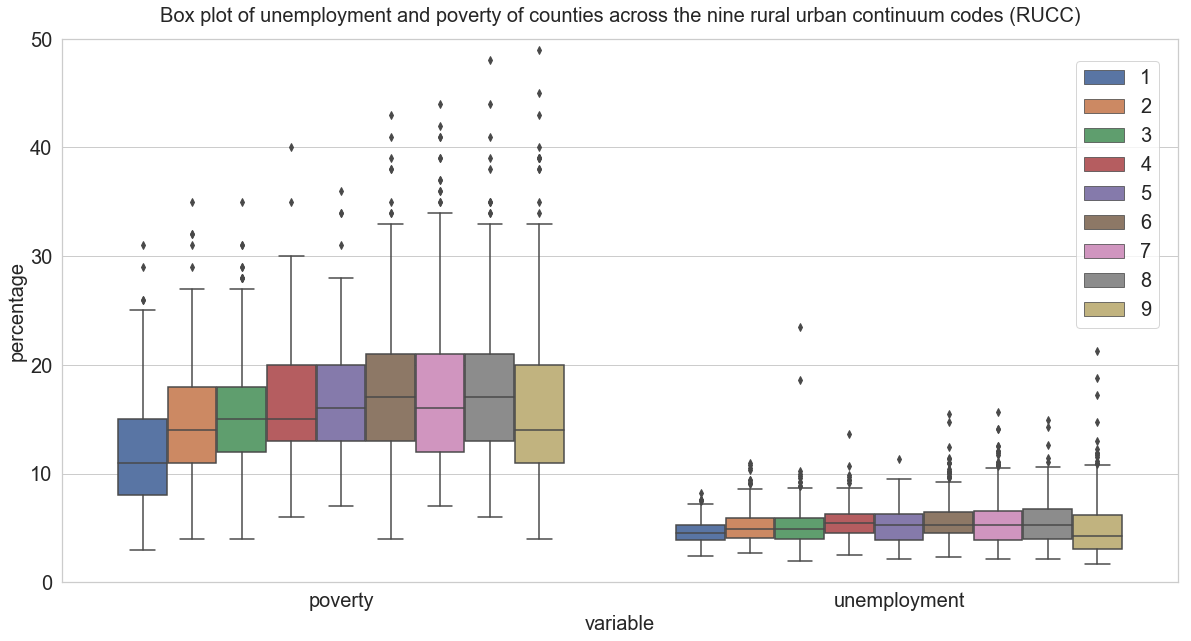

In [61]:
#Melt the dataframe based on unemployment and poverty
df_melt2 = pd.melt(df,id_vars='RUCC',value_vars=['poverty','unemployment'], var_name='variable',value_name='percentage')

# Create the boxplot of the poverty and unemployment for each RUCC code
figure, ax = plt.subplots(figsize=(20,10))
sns.boxplot(ax=ax, x='variable',y='percentage',hue='RUCC', data=df_melt2)
ax.legend(loc='lower left',bbox_to_anchor=(0.9,0.45),fontsize=20)
ax.set_title('Box plot of unemployment and poverty of counties across the nine rural urban continuum codes (RUCC)',\
             fontsize = 20, y = 1.02)
ax.set_xlabel('variable',fontsize = 20)
ax.set_ylabel('percentage',fontsize = 20)
ax.tick_params(axis='both', labelsize=20)
ax.set_ylim(0,50)
plt.show()

### Observations

#### 1) The quartiles (first quartile, median, and third quartile) of the poverty in RUCC 1 (the blue box) is significantly lower compared to the corresponding quartiles in the rest of RUCC. In other words, counties in RUCC 1 have the least poverty among all rural urban continuum codes

#### 2) The medians of the poverty in RUCC 2 to RUCC 9 (from the orange to the beige boxes) are quite close to each other but the first and third quartiles of RUCC 2 and 3 (the orange and green boxes) are lower than the corresponding quartiles of RUCC 4 to 9 (from the red to the beige boxes).

#### 3) There is not a major difference between the unemployment distribution of the nine RUCC.

### Step 6: Create the heatmap of poverty, unemployment, and education vs. the nine rural urban continuum codes (RUCC). Again, in order to simplify the interpretation, the new education variable, which is the sum of college/associate_degree and bachelors/higher, is used instead of the four education levels. Since RUCC is a categorical variable, nine dummy variables are introduced, one for each RUCC

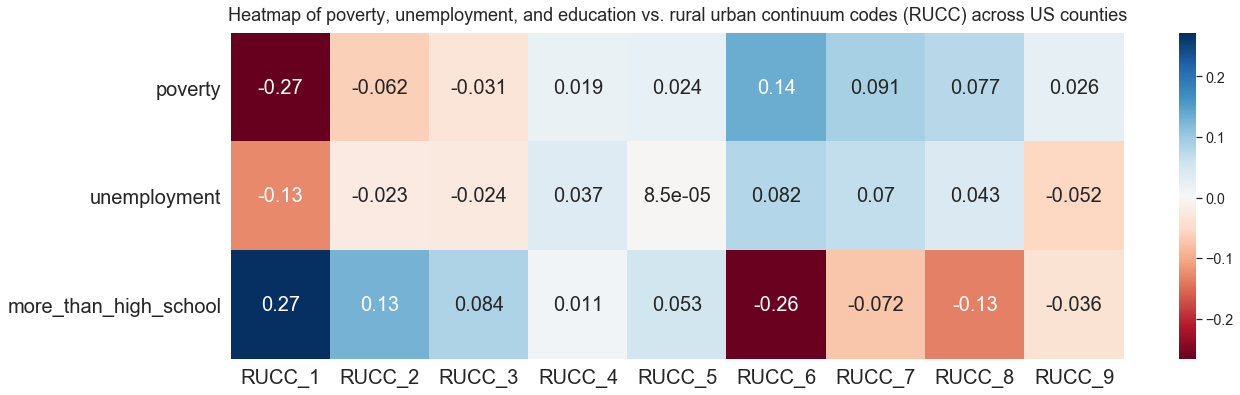

In [68]:
# Since the dataframe was sorted based on RUCC before, it's necessary to reset the index to correctly create the dummy variables
df.reset_index(inplace=True,drop=True)
df_copy = df.copy()
# Create the dataframe for dummy variables and concat it to the original dataframe
ohe = OneHotEncoder()
RUCC_matrix = ohe.fit_transform(df.RUCC.values.reshape(-1,1)).toarray()
RUCC_df = pd.DataFrame(RUCC_matrix,columns = ['RUCC_'+str(i) for i in np.arange(1,10)])
df_concat = pd.concat([df_copy,RUCC_df],axis = 1)

# Create the correlation matrix, select the necessary elements, and create the heatmap between poverty, unemployment, and
# more_than_high_school on the one hand and the nine RUCC on the other hand.
plt.figure(figsize=(20,6))
corr_df_concat = df_concat.iloc[:,8:].corr().iloc[:3,3:]
sns.heatmap(corr_df_concat,annot=True,annot_kws={'size':20},cmap='RdBu')
plt.title('Heatmap of poverty, unemployment, and education vs. rural urban continuum codes (RUCC) across US counties', \
          fontsize=18, y=1.02)
plt.yticks(rotation = 0)
plt.tick_params(labelsize = 20)
plt.show()

### Observation
#### There are two different patterns as the rural urban continuum codes(RUCC) goes higher:

#### a) As the RUCC changes from 1 to 6, the values of its correlation with poverty and unemployment go up such that they have the highest negative value at RUCC 1 (-0.27 for poverty and -0.13 for unemployment) and highest positive value at RUCC 6 (0.14 for poverty and 0.082 for unemployment). On the other hand, the value of the correlation between RUCC and more_than_high_school changes in the oposite direction, i.e. it has the highest positive value (0.27) at RUCC 1 and the only negative value at RUCC 6 (-0.26). 

#### b) As the RUCC changes from 6 to 9, the change of all the three correlations switch direction although they don't reach their level at RUCC 1; the value of the correlation between RUCC and poverty  goes down such that its value at RUCC 9 is 0.026. The correlation between RUCC and unemployment goes down as well such that its value at RUCC 9 is  -0.052. On the other hand, the correlation between RUCC and more_than_high_school goes up such that it has the value of -0.036 at RUCC 9. 

#### It can be concluded that rural urban continuum codes 1 and 6 respectively, have the best and worst impact on increasing education, reducing poverty, and reducing unemployment. Their impact on unemployment is not as much as their impact on education and poverty. 

### Step 7: Create the boxplot of the four education levels as well as unemployment and poverty across the counties in each of the four geographical regions; south, west, northeast, and midwest

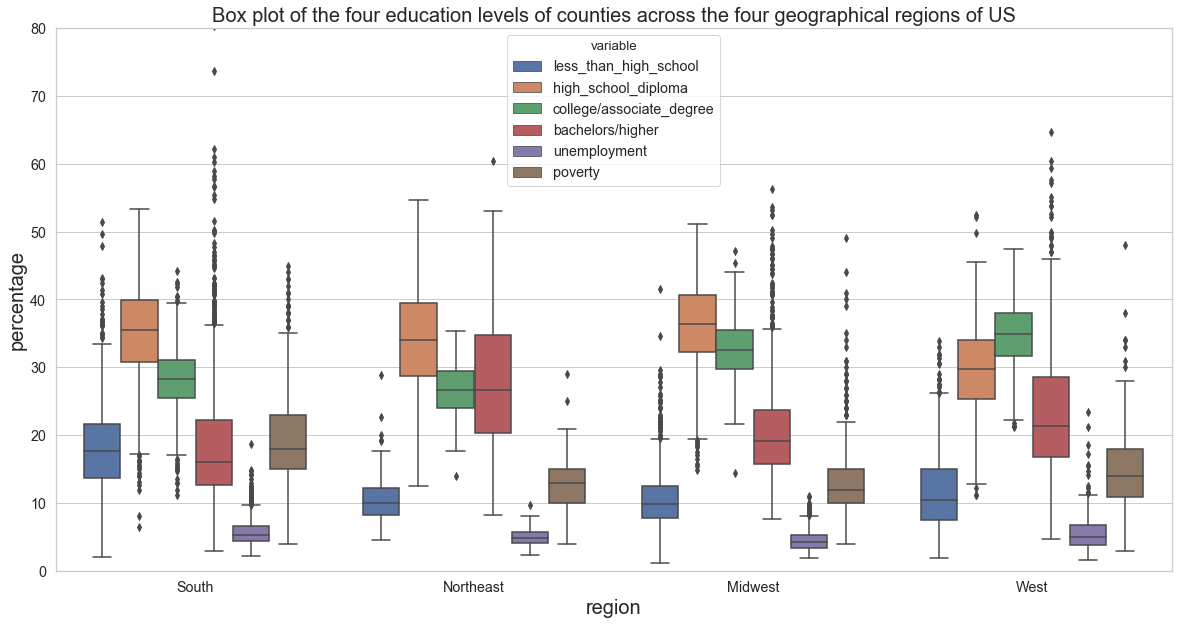

In [69]:
#Order the data frame based on South, Northeast, Midwest, and West.
df.region = pd.Categorical(df.region, categories=["South","Northeast","Midwest","West"],ordered=True)
df.sort_values('region',inplace=True)

# Melt the dataframe across all quantitative variables 
df_melt4 = pd.melt(df,id_vars='region',value_vars=['less_than_high_school','high_school_diploma',\
                                                 'college/associate_degree','bachelors/higher','unemployment',\
                                                 'poverty'], var_name='variable',value_name='percentage')

plt.figure(figsize=(20,10))

# Create the boxplot of the four education level based on RUCC code
sns.boxplot(x='region',y='percentage',hue='variable',data=df_melt4)
plt.title('Box plot of the four education levels of counties across the four geographical regions of US',fontsize = 20)
plt.xlabel('region',fontsize = 20)
plt.ylabel('percentage',fontsize = 20)
plt.ylim(0,80)

plt.show()

### Observation 
#### 1) Education: As it was observed in step 1, over the entire US, less_than_high_school, bachelors/higher, college/associate_degree, and high_school_diploma, respectively, have lowest to highest quartiles (median, first and third quartiles) among the four first quartiles, the four medians, and the four third quartiles, respectively.

#### a) South does not follow the genral trend because the quartiles of the box plot of bachelors/higher (the red box) is too close to the corresponding quartiles of the box plot of less_than_high_school (the blue box) and too far from the corresponding quartiles of the box plots of the other two education levels (orange and green boxes)

#### b) Northeast also does not follow the general trend either but because of different reasons than South. The quartiles of the box plot of bachelors/higher (the red box) is too far from the corresponding quartiles of the box plot of less_than_high_school (the blue box) and too close to the corresponding quartiles of the box plots of the other two education levels (orange and green boxes). In addition, the quartiles of the box plot of college/associate_degree (the green box) are too far from the corresponding quartiles of the box plot of high_school_diploma (the orange box).

#### c) West also does not follow the genral trend because the quartiles of the box plot of college/associate_degree (the green box) are more than the corresponding quartiles of high_school_diploma (the orange box).

#### d) Midwest is the only region which follows the genral trend.

#### Therefore, it can be concluded counties in South has the least education among the four geographical regions.

#### 2) The quartiles (first quartile, median, and third quartile) of the poverty (the brown box) in South are higher than the corresponding quartiles in other regions. In other words, counties in South have the most poverty among the four geographical regions

#### 3) The quartiles of the poverty (the brown box) in Northeast and Midwest are quite similar and slightly lower than the corresponding quartiles in West. In other words, counties in Northeast and Midwest have the least poverty among the four geographical regions

#### 3) There is not a major difference between the unemployment distribution (the purple boxes) of the four geographical regions.

### Step 8: Create the barplot of the mean of each six quantitative variables of counties across the four geographical regions; south, west, northeast, and midwest

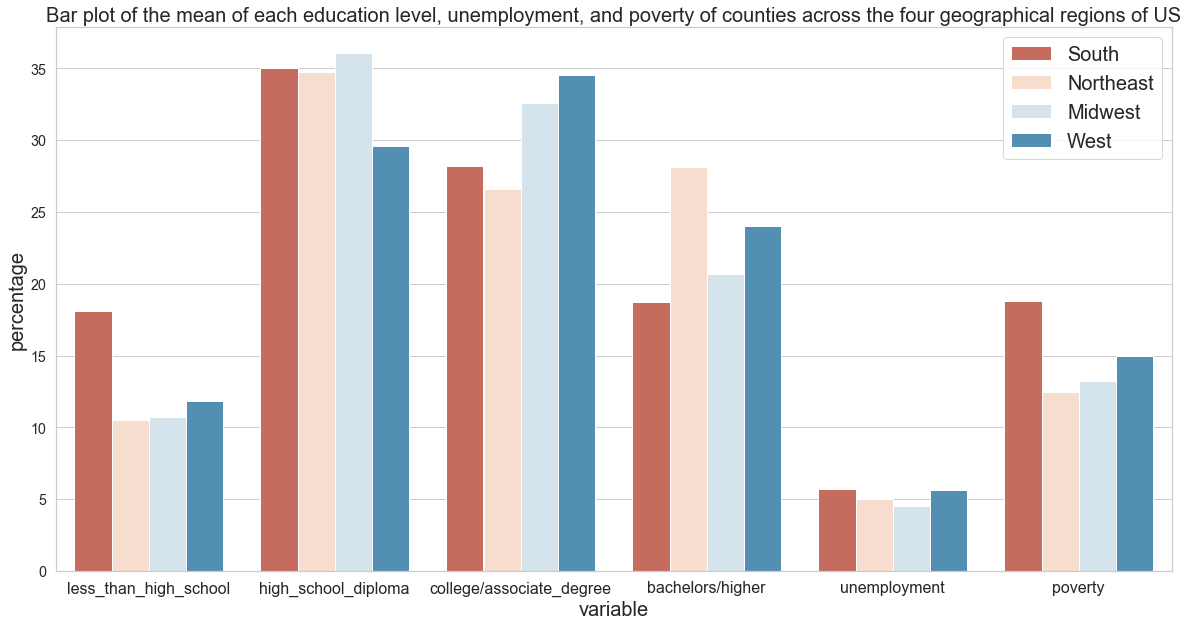

In [70]:
# Create the bar plot
plt.figure(figsize=(20,10))
sns.barplot(x='variable',y='percentage',hue='region',data=df_melt4,palette='RdBu',ci=None)
plt.title('Bar plot of the mean of each education level, unemployment, and poverty of counties across the\
 four geographical regions of US',fontsize = 20)
plt.legend(fontsize=20)
plt.xlabel('variable',fontsize = 20)
plt.ylabel('percentage',fontsize = 20)
plt.tick_params(axis='x', labelsize=16)

### Observations

#### 1) South has the highest mean of less_than_high_school and lowest bachelors/higher
#### 2) South has the highest mean of poverty
#### 3) The mean of unemployment almost remains the same

### Alternative for Steps 7 and 8

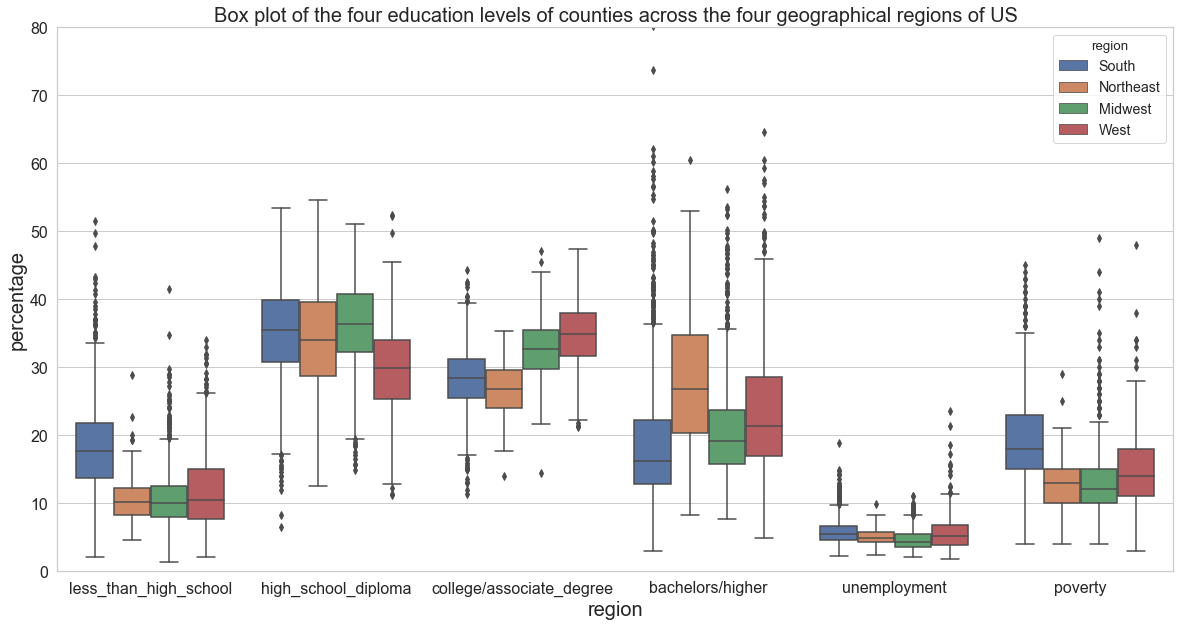

In [74]:
#Order the data frame based on South, Northeast, Midwest, and West.
df.region = pd.Categorical(df.region, categories=["South","Northeast","Midwest","West"],ordered=True)
df.sort_values('region',inplace=True)

# Melt the dataframe across all quantitative variables 
df_melt4 = pd.melt(df,id_vars='region',value_vars=['less_than_high_school','high_school_diploma',\
                                                 'college/associate_degree','bachelors/higher','unemployment',\
                                                 'poverty'], var_name='variable',value_name='percentage')

plt.figure(figsize=(20,10))

# Create the boxplot of the four education level based on RUCC code
sns.boxplot(x='variable',y='percentage',hue='region',data=df_melt4)
plt.title('Box plot of the four education levels of counties across the four geographical regions of US',fontsize = 20)
plt.xlabel('region',fontsize = 20)
plt.ylabel('percentage',fontsize = 20)
plt.ylim(0,80)
plt.tick_params(labelsize=16)
plt.show()

### Observations

#### 1) less_than_high_school: The quartiles (median, first, and third quartiles) in South (the blue box) are significantly higher than the corresponding quartiles in the other three geographical regions
#### 2) high_school_diploma: The quartiles in West (thered box) are lower than the corresponding quartiles in the other three geographical regions
#### 3) The quartiles in Midwest (the green box) and West (the red box) are higher than the corresponding quartiles in the other two geographical regions
#### 4) The quartiles in Northeast (the orange box) and in South (the blue box) have respectively the highest and lowest values among the corresponding quartiles of the four geographical regions
#### Therefore, it can be concluded counties in South has the least education among the four geographical regions.

#### 2) The quartiles (first quartile, median, and third quartile) of the poverty (the brown box) in South are higher than the corresponding quartiles in other regions. In other words, counties in South have the most poverty among the four geographical regions

#### 3) The quartiles of the poverty (the brown box) in Northeast and Midwest are quite similar and slightly lower than the corresponding quartiles in West. In other words, counties in Northeast and Midwest have the least poverty among the four geographical regions

#### 3) There is not a major difference between the unemployment distribution (the purple boxes) of the four geographical regions.

### Step 9: Create the heatmap of poverty, unemployment, and education vs. the four geographical regions. Again, in order to simplify the interpretation, the new education variable, which is the sum of college/associate_degree and bachelors/higher, is used instead of the four education levels. Since region is a categorical variable, four dummy variables are introduced, one for each region

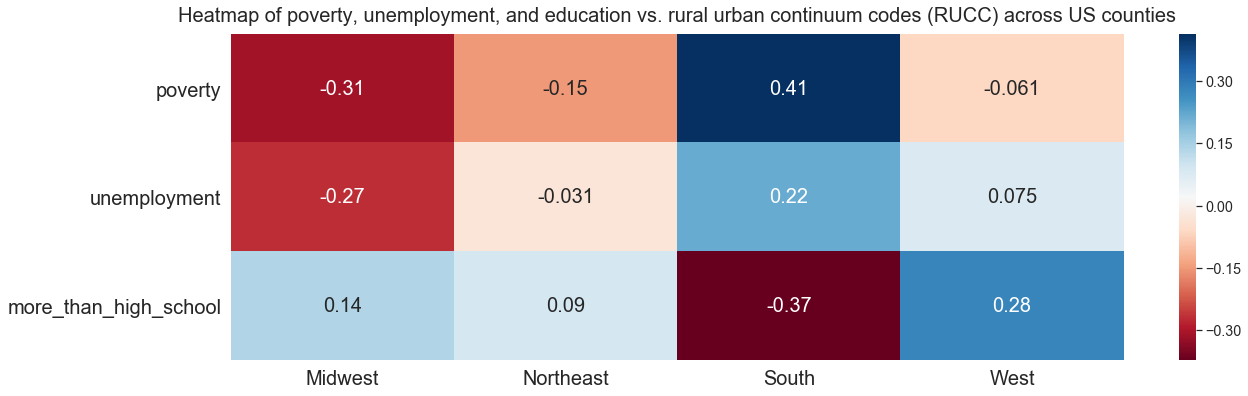

In [85]:
# Since the dataframe was sorted based on region before, it's necessary to reset the index to correctly create the dummy variables
df.reset_index(inplace=True,drop=True)
df_copy = df.copy()

# Create the dataframe for dummy variables and concat it to the original dataframe
lb = LabelBinarizer()
region_matrix = lb.fit_transform(df.region.values)
region_df = pd.DataFrame(region_matrix,columns = ['Midwest','Northeast','South','West'])
df_concat = pd.concat([df_copy,region_df],axis = 1)

# Create the correlation matrix, select the necessary elements, and create the heatmap between poverty, unemployment, and
# more_than_high_school on the one hand and the  four geographical regions on the other hand.
plt.figure(figsize=(20,6))
corr_df_concat = df_concat.iloc[:,8:].corr().iloc[:3,3:]
sns.heatmap(corr_df_concat,annot=True,annot_kws={'size':20},cmap='RdBu')
plt.title('Heatmap of poverty, unemployment, and education vs. rural urban continuum codes (RUCC) across US counties', \
          fontsize=20, y=1.02)
plt.yticks(rotation = 0)
plt.tick_params(labelsize = 20)
plt.show()

### Observations
#### 1) South has the worst impact on increasing education, reducing unemployment, and reducing poverty.
#### 2) Midwest has the best impact on reducing unemployment and reducing poverty.
#### 3) West has the best impact on increasing education, eventhough, its impact on reducing poverty is not as much as Midwest and Northeast. Interestingly, West has a negative impact on reducing unemployment.